In [2]:
from datetime import datetime,date
import pandas as pd 
import numpy as np

datanyc=pd.read_csv('/Users/nayyar/Downloads/yellow_tripdata_2016-01.csv')

In [3]:
#making columns for day of week
datanyc['day']=datanyc['tpep_pickup_datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%A'))
datanyc['trip']=np.where(datanyc['trip_distance']>=0, 1, 0)

In [5]:
#making column for hour of the day
datanyc['hour']=datanyc['tpep_pickup_datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S').time().strftime('%H'))
datanyc.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,day,trip,hour
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,...,7.5,0.5,0.5,0.0,0.0,0.3,8.8,Friday,1,00
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,...,18.0,0.5,0.5,0.0,0.0,0.3,19.3,Friday,1,00
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,...,33.0,0.5,0.5,0.0,0.0,0.3,34.3,Friday,1,00
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,...,16.5,0.0,0.5,0.0,0.0,0.3,17.3,Friday,1,00
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,...,8.0,0.0,0.5,0.0,0.0,0.3,8.8,Friday,1,00


In [6]:
#making new data frame for each day
mon=datanyc['day']=='Monday'
monday=pd.DataFrame(data=datanyc[mon].groupby(by=['hour'])['trip'].sum()).reset_index()

tue=datanyc['day']=='Tuesday'
tuesday=pd.DataFrame(data=datanyc[tue].groupby(by=['hour'])['trip'].sum()).reset_index()

wed=datanyc['day']=='Wednesday'
wednesday=pd.DataFrame(data=datanyc[wed].groupby(by=['hour'])['trip'].sum()).reset_index()

thu=datanyc['day']=='Thursday'
thursday=pd.DataFrame(data=datanyc[thu].groupby(by=['hour'])['trip'].sum()).reset_index()

fri=datanyc['day']=='Friday'
friday=pd.DataFrame(data=datanyc[fri].groupby(by=['hour'])['trip'].sum()).reset_index()

sat=datanyc['day']=='Saturday'
saturday=pd.DataFrame(data=datanyc[sat].groupby(by=['hour'])['trip'].sum()).reset_index()

sun=datanyc['day']=='Sunday'
sunday=pd.DataFrame(data=datanyc[sun].groupby(by=['hour'])['trip'].sum()).reset_index()


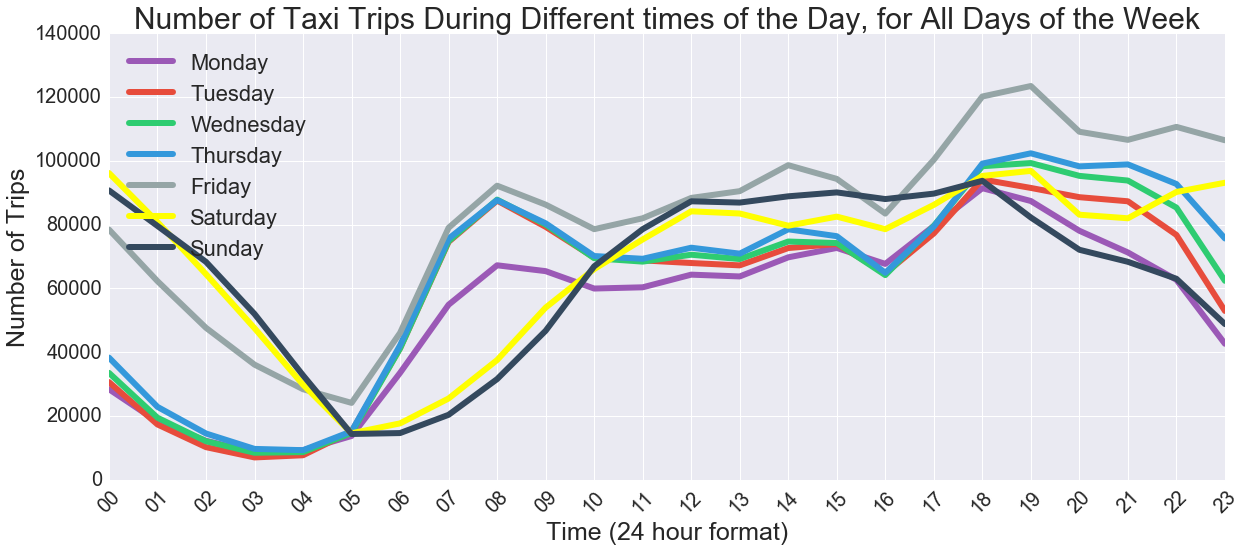

In [9]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as pl
pl.subplots(figsize=(20,8))
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
xTicks =monday['hour']
pl.xticks(x,xTicks)
pl.xticks(range(24), xTicks, rotation=45, size=20) #writes strings with 45 degree angle
pl.yticks(size=20)
pl.xlabel('Time (24 hour format)', size=25)
pl.ylabel('Number of Trips', size=25)
p=pl.plot(x,monday['trip'],color="#9b59b6",linewidth=6,label='Monday')
p=pl.plot(x,tuesday['trip'],color="#e74c3c",linewidth=6, label='Tuesday')
p=pl.plot(x,wednesday['trip'],color="#2ecc71",linewidth=6,label='Wednesday')
p=pl.plot(x,thursday['trip'],color="#3498db",linewidth=6,label='Thursday')
p=pl.plot(x,friday['trip'],color="#95a5a6", linewidth=6,label='Friday')
p=pl.plot(x,saturday['trip'],color="yellow",linewidth=6,label='Saturday')
p=pl.plot(x,sunday['trip'],color="#34495e",linewidth=6,label='Sunday')
pl.legend(loc=2,prop={'size':22})
pl.title('Number of Taxi Trips During Different times of the Day, for All Days of the Week', size=30)
pl.savefig("Analysis_2.jpeg", bbox_inches='tight')